# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [195]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


## Load the Data

In [196]:
df=pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [197]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [199]:
df.shape

(52000, 26)

In [200]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [201]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [202]:
df.duplicated().sum()

43

In [203]:
df.dropna(inplace=True)
df.shape

(50029, 26)

In [204]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [205]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Date                                         49986 non-null  object 
 9   Day_of_Week                                  49986 non-null  int64  
 10  Loc

In [207]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        49986 non-null  float64       
 1   Location_Northing_OSGR                       49986 non-null  float64       
 2   Longitude                                    49986 non-null  float64       
 3   Latitude                                     49986 non-null  float64       
 4   Police_Force                                 49986 non-null  int64         
 5   Accident_Severity                            49986 non-null  float64       
 6   Number_of_Vehicles                           49986 non-null  int64         
 7   Number_of_Casualties                         49986 non-null  float64       
 8   Date                                         49986 non-null  datetime64[ns]
 9   

<ipython-input-207-d07580c8a9de>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [208]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No'], dtype=object)

In [209]:
df['Did_Police_Officer_Attend_Scene_of_Accident']=LabelEncoder().fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        49986 non-null  float64       
 1   Location_Northing_OSGR                       49986 non-null  float64       
 2   Longitude                                    49986 non-null  float64       
 3   Latitude                                     49986 non-null  float64       
 4   Police_Force                                 49986 non-null  int64         
 5   Accident_Severity                            49986 non-null  float64       
 6   Number_of_Vehicles                           49986 non-null  int64         
 7   Number_of_Casualties                         49986 non-null  float64       
 8   Date                                         49986 non-null  datetime64[ns]
 9   

In [210]:
df['Road_Surface_Conditions'].unique()

array(['Flood (Over 3cm of water)', 'Dry', 'Wet/Damp', 'Snow',
       'Frost/Ice', 'Normal'], dtype=object)

In [211]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [212]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['No physical crossing within 50 meters',
       'non-junction pedestrian crossing', 'Zebra crossing',
       'Pedestrian phase at traffic signal junction', 'Central refuge',
       'Footbridge or subway'], dtype=object)

In [213]:
df['Pedestrian_Crossing-Human_Control'].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol'], dtype=object)

In [214]:
df['Road_Type'].unique()

array(['Dual carriageway', 'Single carriageway', 'One way street',
       'Unknown', 'Roundabout', 'Slip road'], dtype=object)

In [215]:
df['Weather_Conditions'].unique()

array(['Raining with high winds', 'Fine without high winds',
       'Raining without high winds', 'Fog or mist',
       'Fine with high winds', 'Unknown', 'Snowing without high winds',
       'Other', 'Snowing with high winds'], dtype=object)

In [216]:
df=pd.get_dummies(df,columns=['Weather_Conditions'])

In [217]:
ob_col=['Road_Type','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Road_Surface_Conditions']
df=pd.get_dummies(df,columns=ob_col)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 55 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Location_Easting_OSGR                                                                49986 non-null  float64       
 1   Location_Northing_OSGR                                                               49986 non-null  float64       
 2   Longitude                                                                            49986 non-null  float64       
 3   Latitude                                                                             49986 non-null  float64       
 4   Police_Force                                                                         49986 non-null  int64         
 5   Accident_Severity                           

In [219]:
df.drop('Local_Authority_(Highway)',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 54 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Location_Easting_OSGR                                                                49986 non-null  float64       
 1   Location_Northing_OSGR                                                               49986 non-null  float64       
 2   Longitude                                                                            49986 non-null  float64       
 3   Latitude                                                                             49986 non-null  float64       
 4   Police_Force                                                                         49986 non-null  int64         
 5   Accident_Severity                           

In [220]:
columns = df.columns
df[['Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Normal',
       'Road_Surface_Conditions_Snow', 'Road_Surface_Conditions_Wet/Damp',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown']]=df[['Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Normal',
       'Road_Surface_Conditions_Snow', 'Road_Surface_Conditions_Wet/Damp',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown']].astype(int)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 54 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Location_Easting_OSGR                                                                49986 non-null  float64       
 1   Location_Northing_OSGR                                                               49986 non-null  float64       
 2   Longitude                                                                            49986 non-null  float64       
 3   Latitude                                                                             49986 non-null  float64       
 4   Police_Force                                                                         49986 non-null  int64         
 5   Accident_Severity                           

In [222]:
df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Accident_Severity','Number_of_Casualties','Urban_or_Rural_Area']]=df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Accident_Severity','Number_of_Casualties','Urban_or_Rural_Area']].astype(int)

In [223]:
df.shape

(49986, 54)

In [224]:
columns=df.columns

for col in columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.85)
  IQR=Q3-Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  df = df[(df[col] >= lb) & (df[col] <= ub)]

df.shape

(9075, 54)

In [225]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
 

In [226]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties','Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Normal',
       'Road_Surface_Conditions_Snow', 'Road_Surface_Conditions_Wet/Damp']])

df=pd.DataFrame(df_scaled,columns=[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties','Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by other authorised person',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Normal',
       'Road_Surface_Conditions_Snow', 'Road_Surface_Conditions_Wet/Damp']])

<Axes: xlabel='None', ylabel='None'>

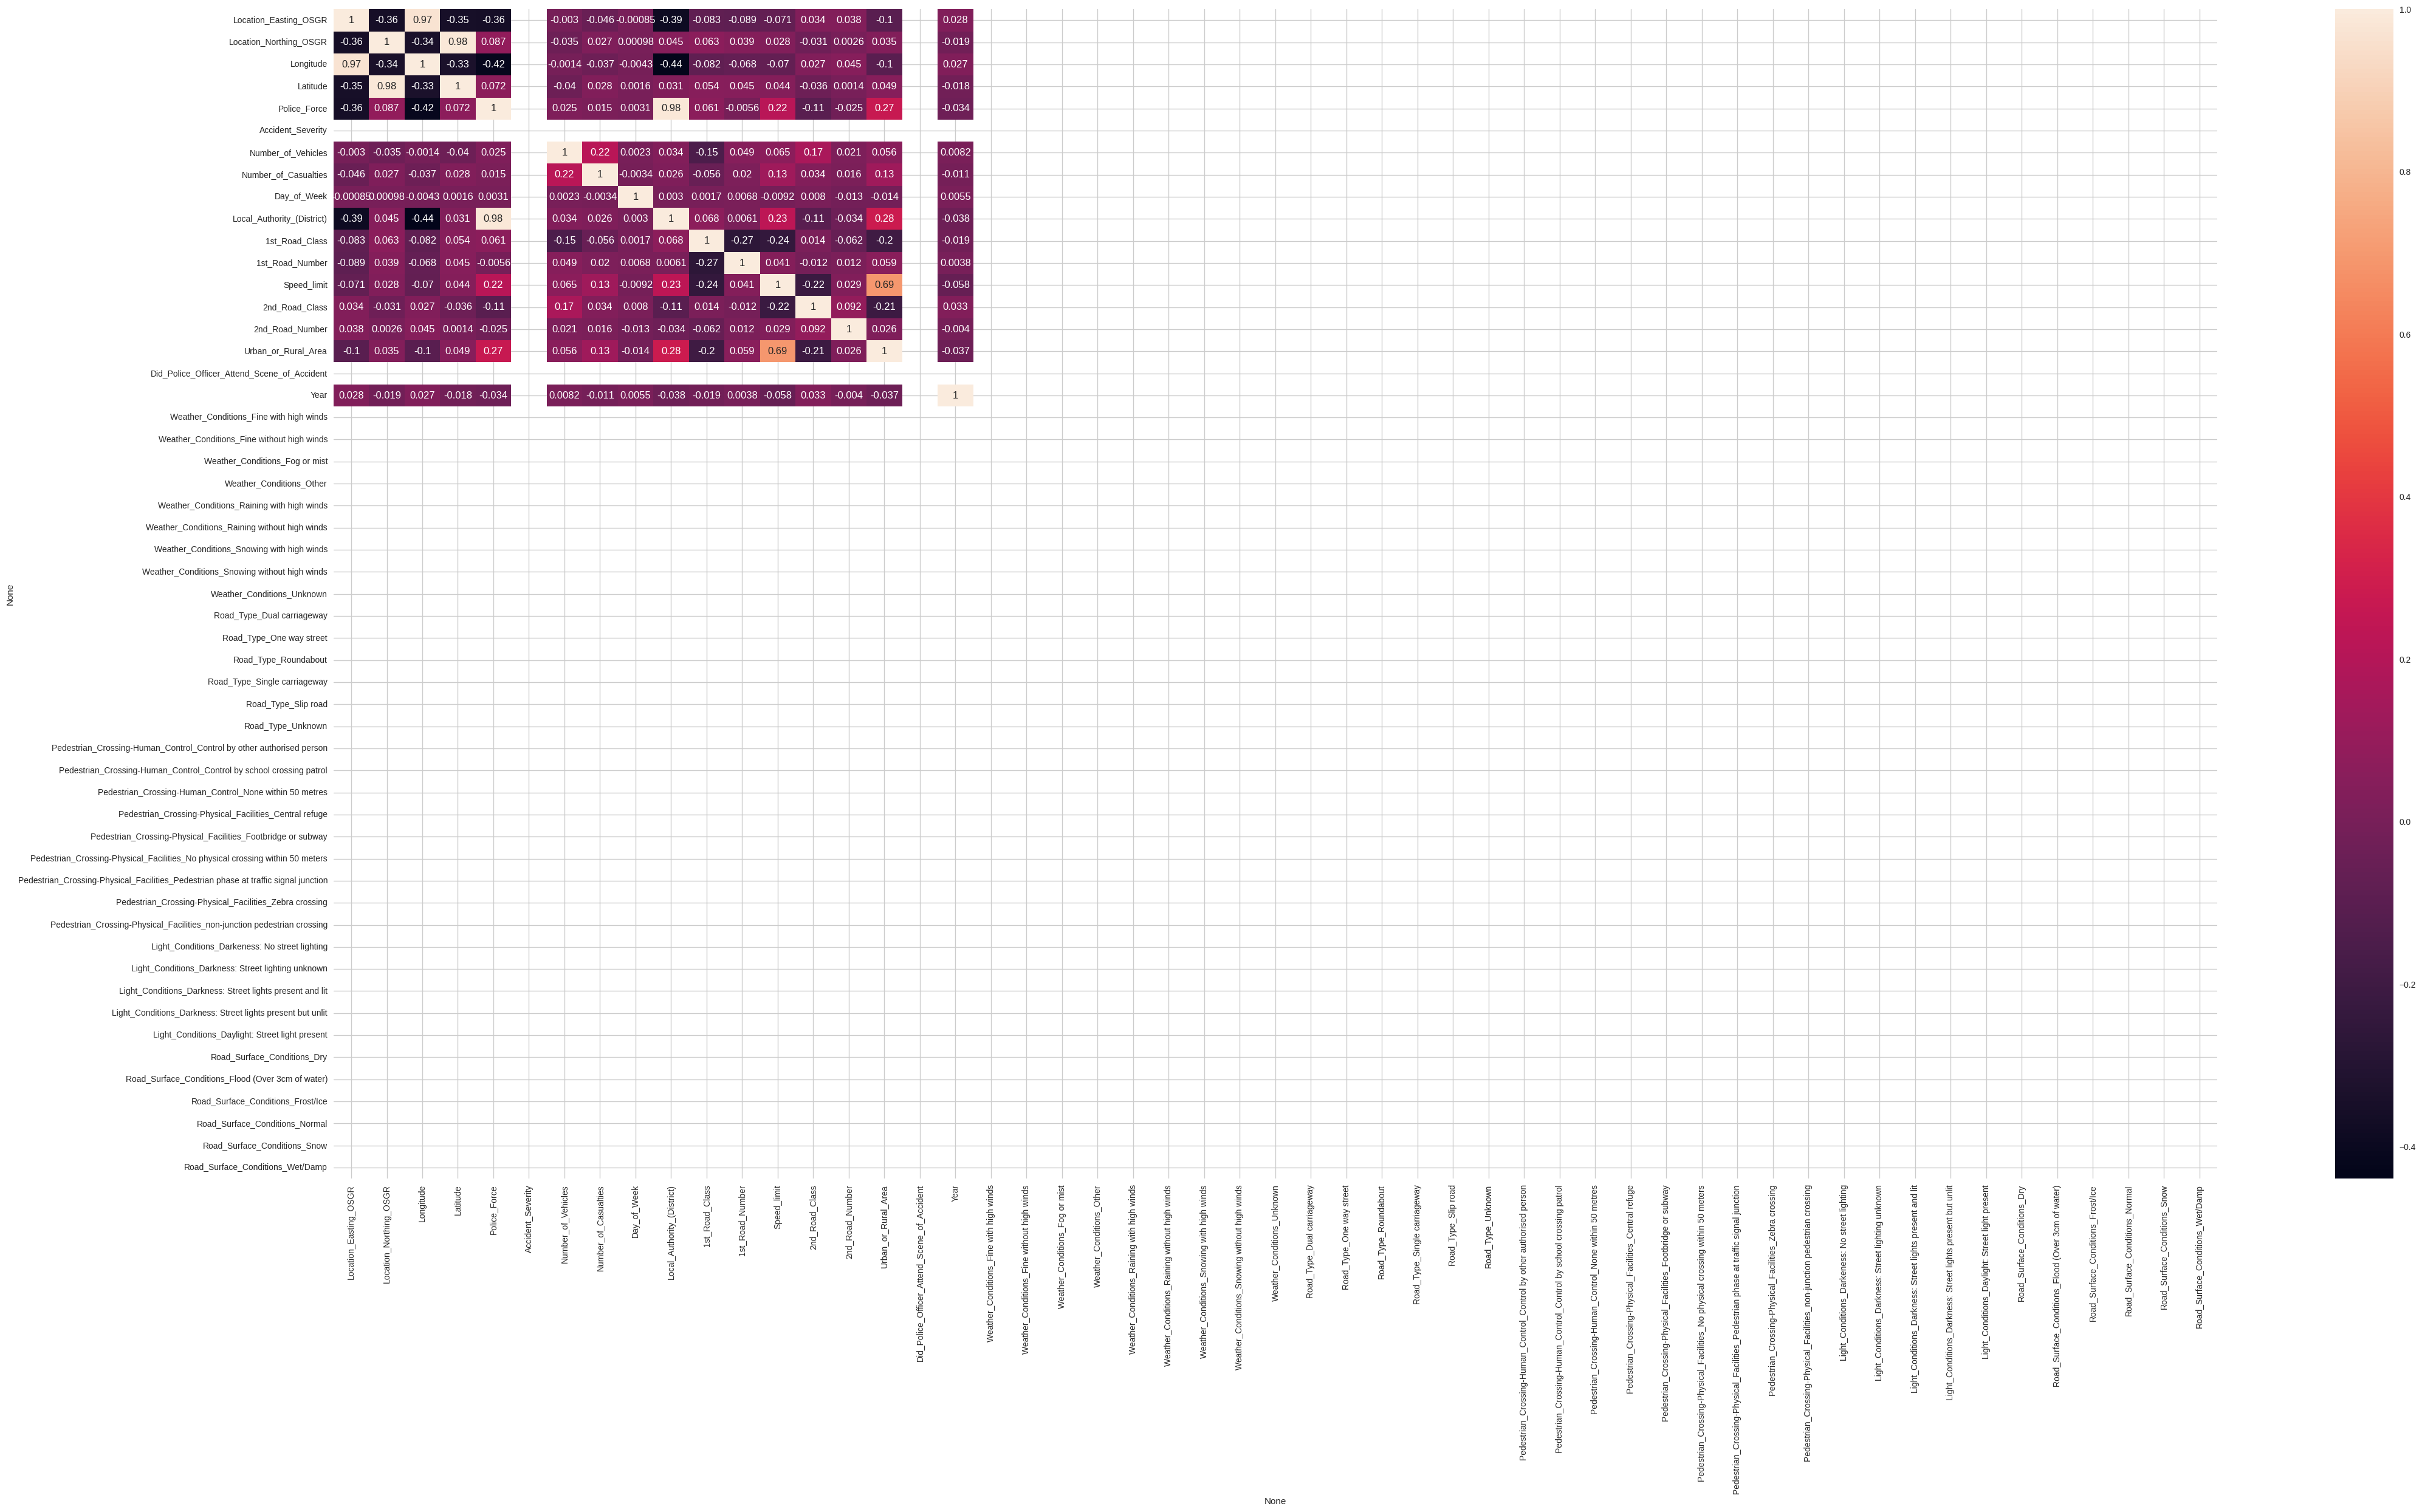

In [227]:
plt.figure(figsize=(50, 25))

sns.heatmap(df.corr(),annot=True)


In [228]:
df.drop('Accident_Severity',axis=1,inplace=True)


<ipython-input-228-9e2ffdcd329b>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop('Accident_Severity',axis=1,inplace=True)


<Axes: xlabel='None', ylabel='None'>

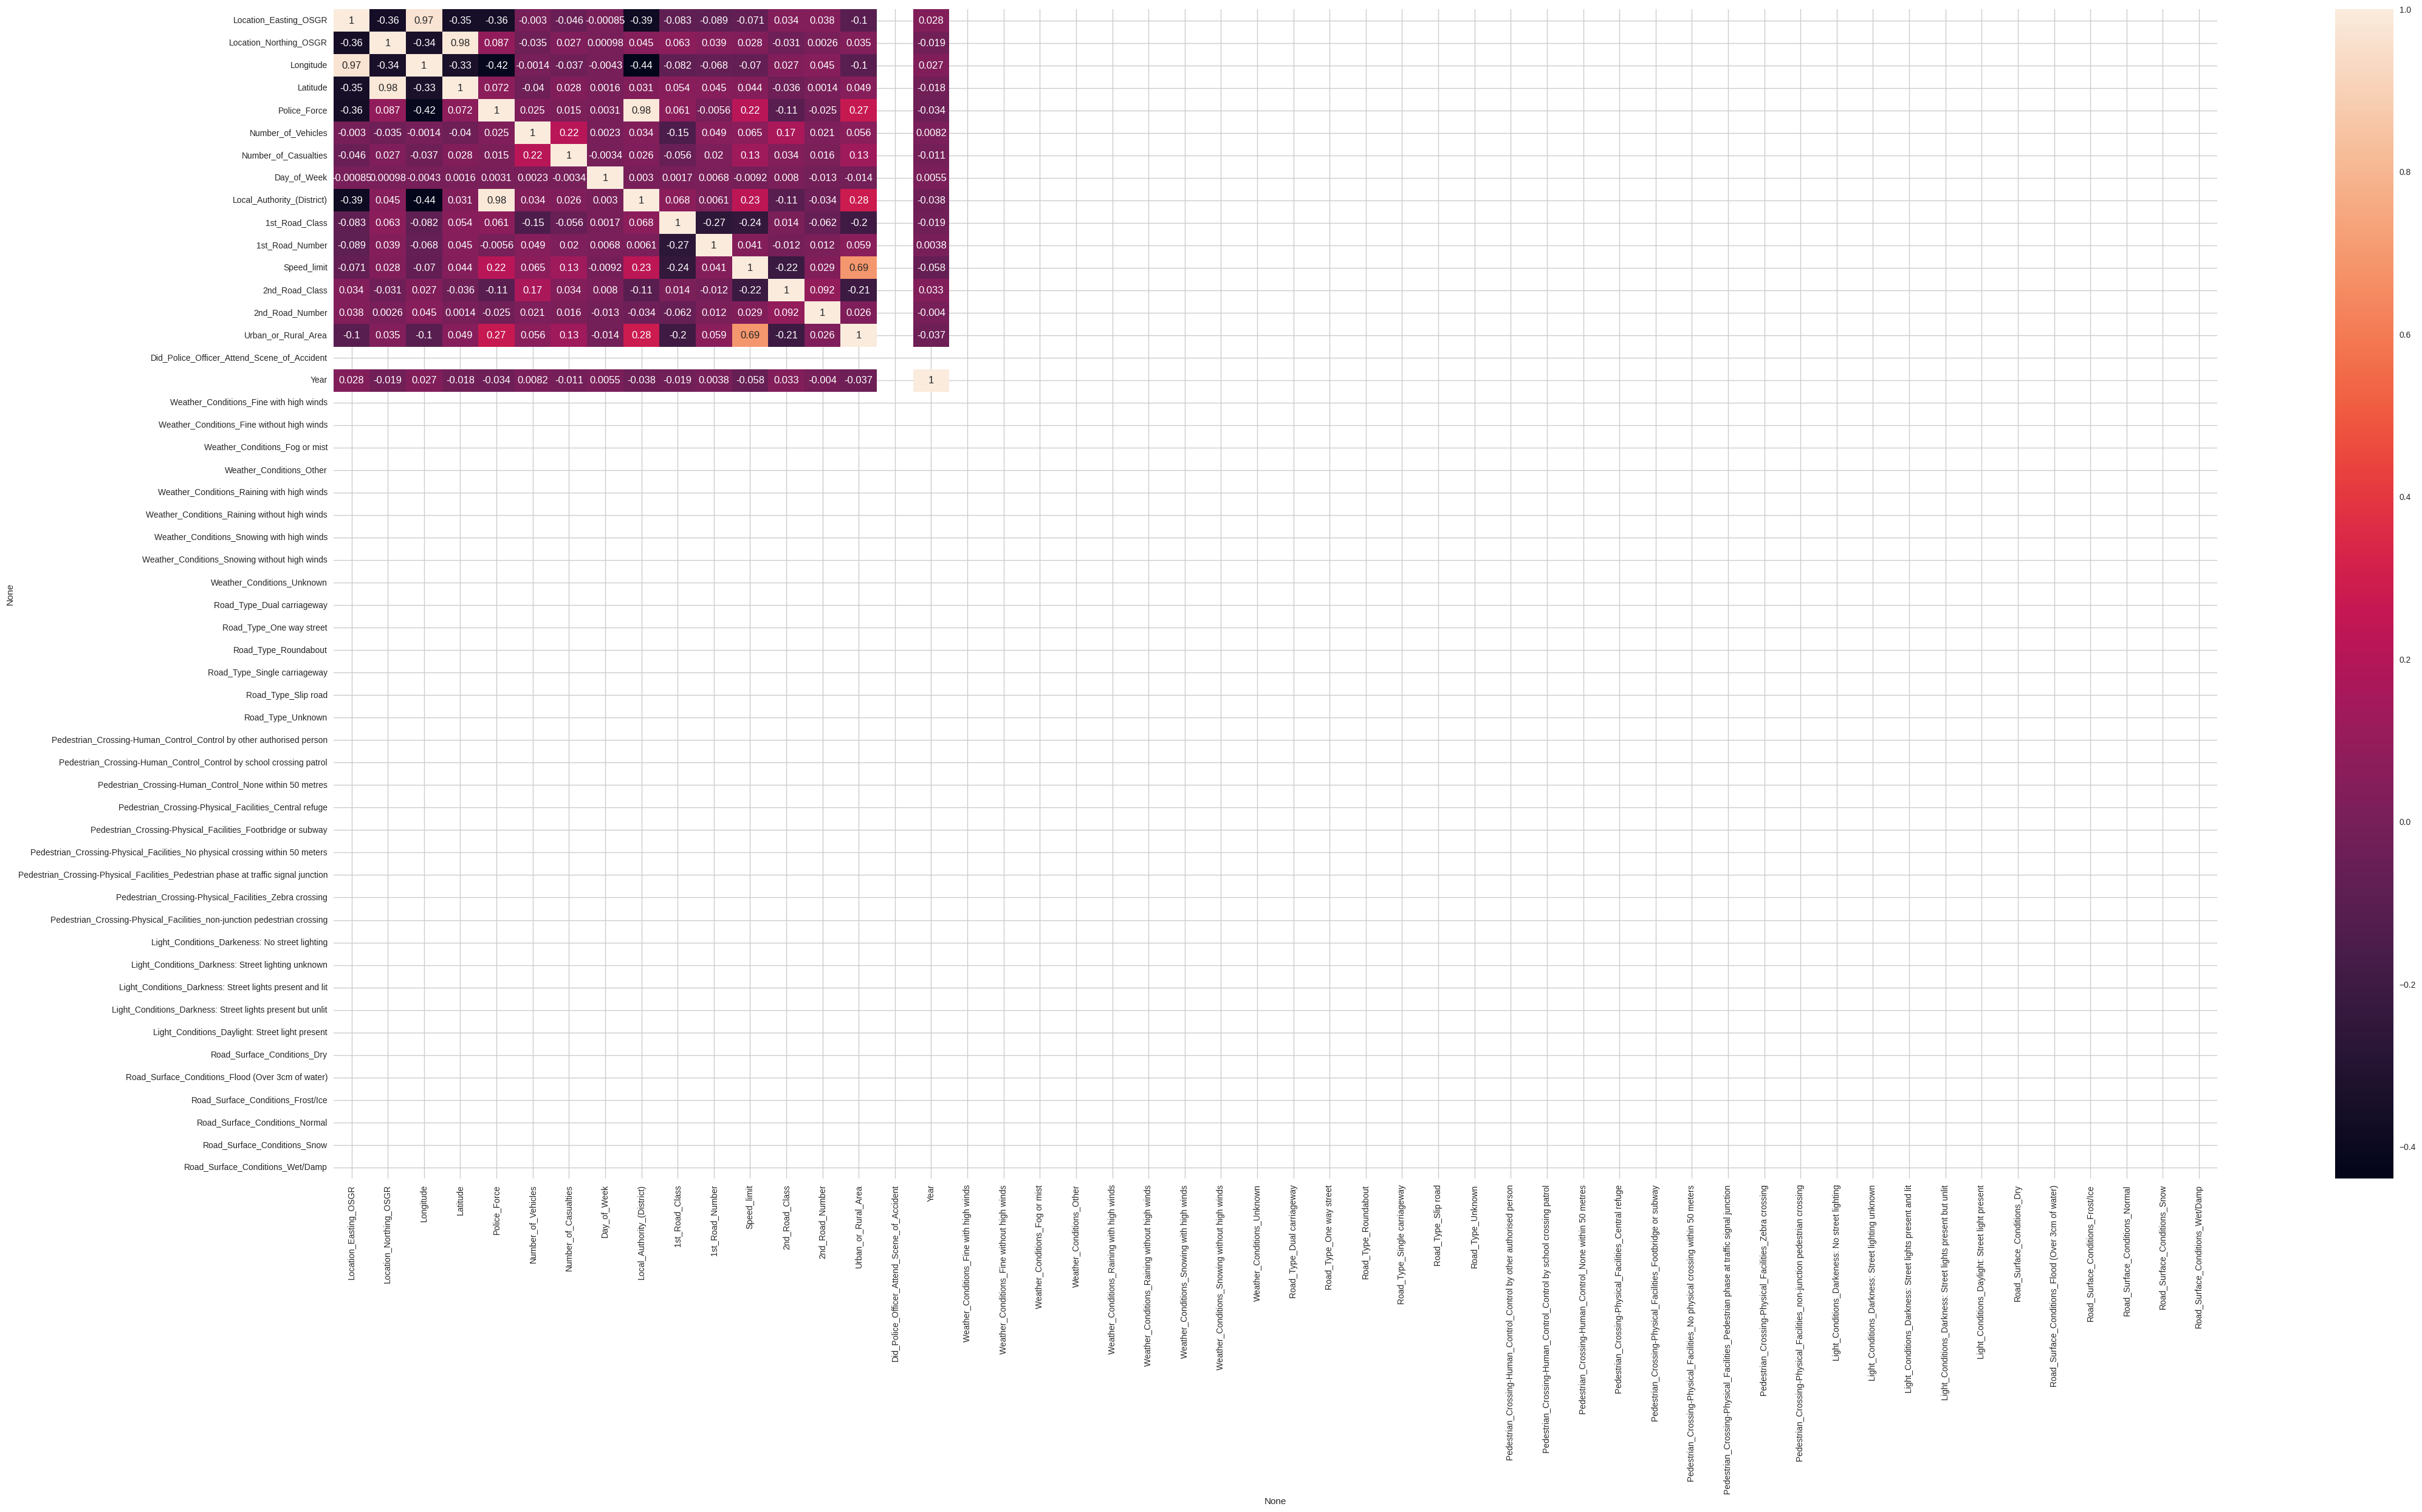

In [229]:
plt.figure(figsize=(50, 25))

sns.heatmap(df.corr(),annot=True)


In [230]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


**I have done this in the previos part as i remove all the columns that does not effect the data**

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

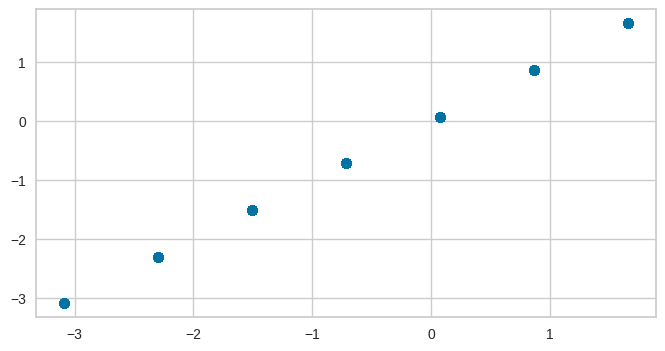

In [231]:
plt.figure(figsize=(8, 4))
plt.scatter(x=df['Longitude'],y=df['Longitude'])
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

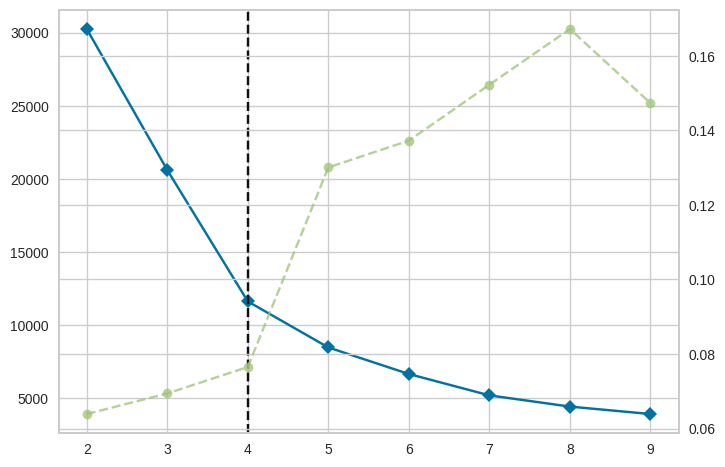

In [232]:
from yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
ElbowV=KElbowVisualizer(km,k=(2,10))
ElbowV.fit(df_pca)


In [233]:
km=KMeans(n_clusters=4,random_state=42)
km.fit(df_pca)
lab=km.labels_
center=km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [234]:
import sklearn.metrics as sm
print(sm.silhouette_score(df_pca, lab, metric='euclidean'))

0.4921809972418047


## Plot the data points with their predicted cluster center

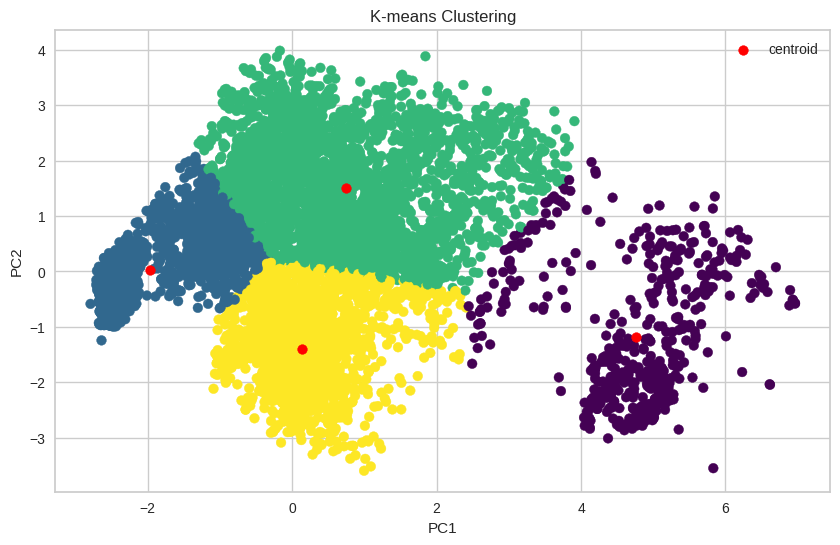

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=lab,cmap='viridis')
plt.scatter(center[:,0],center[:,1],color='red',marker='o',label='centroid')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?



*   i have encoded all the object to a numeircal data and then changed all the bool and the floats to int and then determen the data that have no effect such as date and the data that show no effect in the heatmap wich was Accident_Severity as i made the heat map after i sacaled the data

*   i used the elbow model i imported the model and then i fited and transorm the data and as the plot showed the best number of cluster was 4


*   i used silhouette score as it shows the denstiy of the cluster the closer the resulte is to one the better and less than one would mean that the data points getting closer to the border of the cluster my resulte was 0.492 wiche mean most clusters would be in good center and denstity


*   if the data was proprly enterd and as numbers we would come with better result

